# Data 557: Course Project: Eclipses of a Lifetime

## 0 Import Libraries and Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

## 1 Data preparation

In [3]:
lunar_df = pd.read_csv("dataset/lunar_data_full.csv")
solar_df = pd.read_csv("dataset/solar_data_full.csv")

## 2 Visualizations

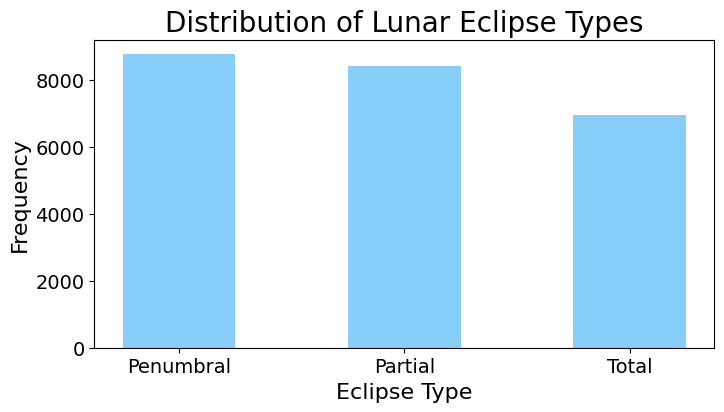

In [3]:
lunar_eclipse_counts = lunar_df['Eclipse.Type'].value_counts()
lunar_eclipse_types = ["Penumbral", "Partial", "Total"]
plt.figure(figsize=(8, 4))
plt.bar(lunar_eclipse_types, lunar_eclipse_counts, color='lightskyblue', width=0.5)
plt.title("Distribution of Lunar Eclipse Types", fontsize=20)
plt.xlabel("Eclipse Type", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [4]:
lunar_eclipse_counts

N    8756
P    8414
T    6958
Name: Eclipse.Type, dtype: int64

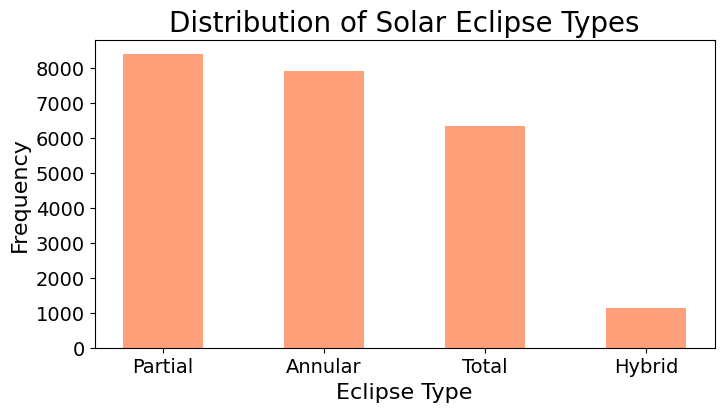

In [5]:
solar_eclipse_counts = solar_df['Eclipse.Type'].value_counts()
solar_eclipse_types = ["Partial", "Annular", "Total", "Hybrid"]
plt.figure(figsize=(8, 4))
plt.bar(solar_eclipse_types, solar_eclipse_counts, color='lightsalmon', width=0.5)
plt.title("Distribution of Solar Eclipse Types", fontsize=20)
plt.xlabel("Eclipse Type", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

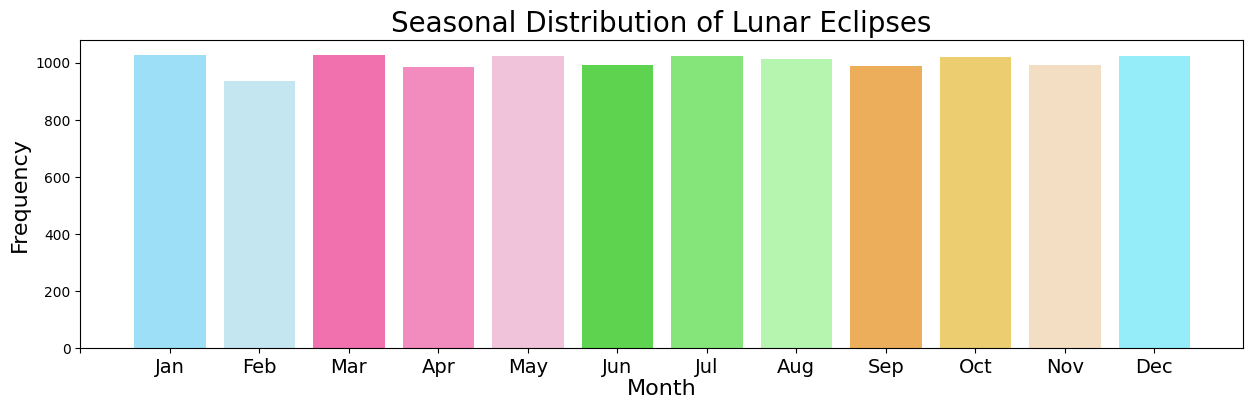

In [8]:
lunar_eclipse_monthly_counts = lunar_df.groupby(['Calendar.Month']).size().reset_index(name="count")

plt.figure(figsize=(15, 4))

bar_width = 0.5
colors = ["#9CDFF6", "#C3E6F1", "#F170AE", "#F38CBE", "#F1C3DA", "#5ED350", "#85E57A", "#B6F5B0", "#EDAE5C", "#ECCD6F", "#F3DEC3", "#95EDFA"]
months = np.arange(0, 13)
month_names = [' ', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(lunar_eclipse_monthly_counts['Calendar.Month'], lunar_eclipse_monthly_counts['count'],color=colors)

plt.title("Seasonal Distribution of Lunar Eclipses", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
x_values = np.arange(len(lunar_eclipse_monthly_counts))
plt.xticks(months, month_names, fontsize=14)
plt.gca().xaxis.set_label_coords(0.5, -0.1)


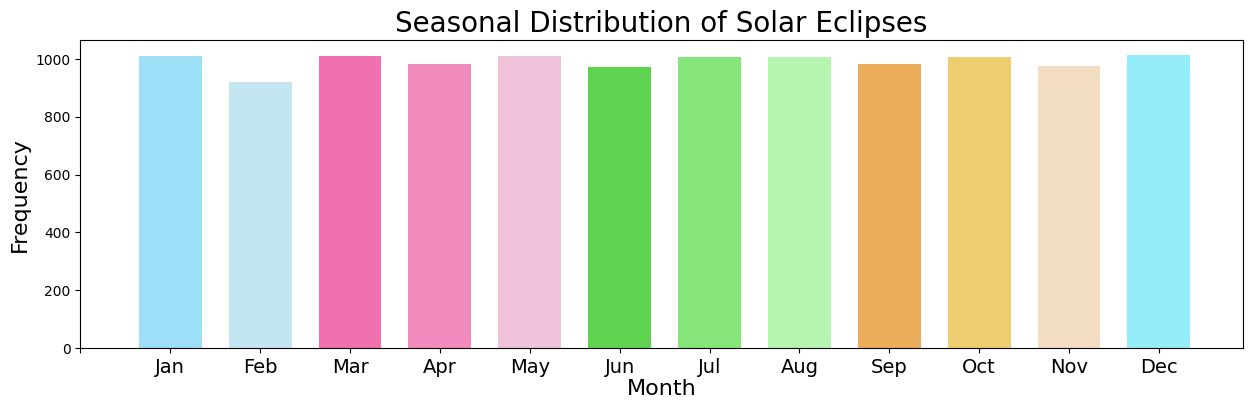

In [7]:
solar_eclipse_monthly_counts = solar_df.groupby(['Calendar.Month']).size().reset_index(name="count")

plt.figure(figsize=(15, 4))

bar_width = 0.7
colors = ["#9CDFF6", "#C3E6F1", "#F170AE", "#F38CBE", "#F1C3DA", "#5ED350", "#85E57A", "#B6F5B0", "#EDAE5C", "#ECCD6F", "#F3DEC3", "#95EDFA"]
months = np.arange(0, 13)
month_names = [' ', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(solar_eclipse_monthly_counts['Calendar.Month'], solar_eclipse_monthly_counts['count'],color=colors, width=bar_width)

plt.title("Seasonal Distribution of Solar Eclipses", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
x_values = np.arange(len(solar_eclipse_monthly_counts))
plt.xticks(months, month_names, fontsize=14)
plt.gca().xaxis.set_label_coords(0.5, -0.1)

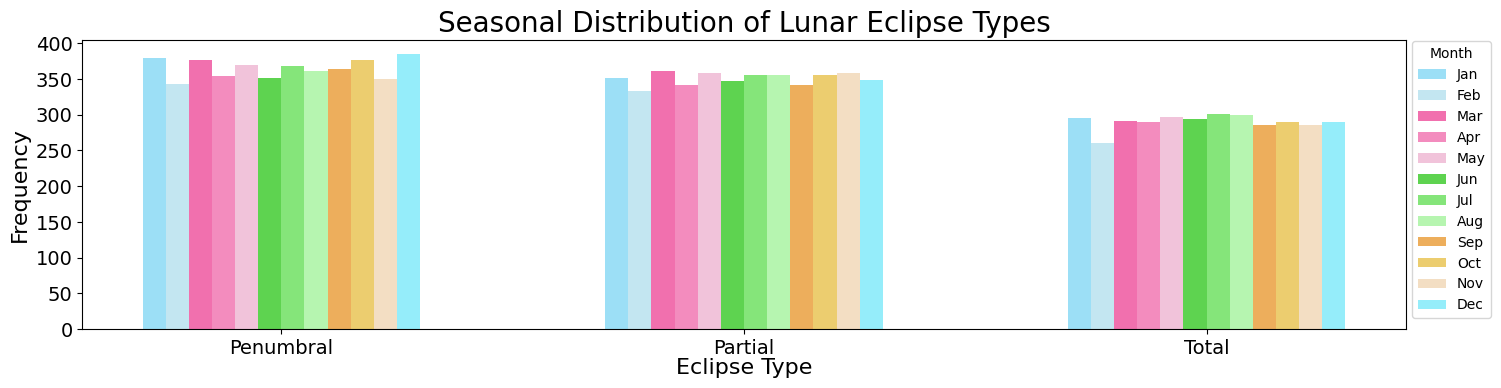

In [9]:
lunar_eclipse_monthly_counts = lunar_df.groupby(['Calendar.Month', 'Eclipse.Type']).size().unstack(fill_value=0)
lunar_eclipse_monthly_counts.columns = ["Penumbral", "Partial", "Total"]

plt.figure(figsize=(15, 4))

bar_width = 0.05
colors = ["#9CDFF6", "#C3E6F1", "#F170AE", "#F38CBE", "#F1C3DA", "#5ED350", "#85E57A", "#B6F5B0", "#EDAE5C", "#ECCD6F", "#F3DEC3", "#95EDFA"]
months = np.arange(1, 13)
month_names = [calendar.month_abbr[month] for month in months]
for i, month in enumerate(months):
    plt.bar(np.arange(len(lunar_eclipse_monthly_counts.columns)) + i * bar_width, lunar_eclipse_monthly_counts.loc[month],
            width=bar_width, color=colors[i], label=f"{month_names[i]}", align='center')

plt.title("Seasonal Distribution of Lunar Eclipse Types", fontsize=20)
plt.xlabel("Eclipse Type", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
x_values = np.arange(len(lunar_eclipse_monthly_counts.columns)) + (len(months) - 1) * bar_width / 2
plt.xticks(x_values, lunar_eclipse_monthly_counts.columns)
plt.gca().set_xlabel('Eclipse Type', labelpad=10)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.legend(title="Month", loc="upper right", bbox_to_anchor=(1.07, 1.02))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

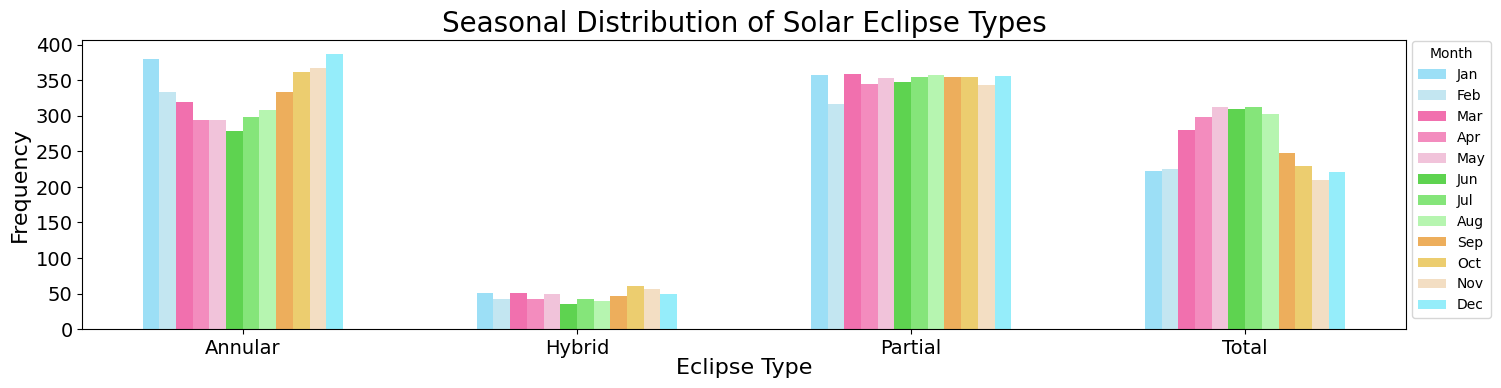

In [10]:
solar_eclipse_monthly_counts = solar_df.groupby(['Calendar.Month', 'Eclipse.Type']).size().unstack(fill_value=0)
solar_eclipse_monthly_counts.columns = ["Annular", "Hybrid", "Partial", "Total"]

plt.figure(figsize=(15, 4))

bar_width = 0.05
colors = ["#9CDFF6", "#C3E6F1", "#F170AE", "#F38CBE", "#F1C3DA", "#5ED350", "#85E57A", "#B6F5B0", "#EDAE5C", "#ECCD6F", "#F3DEC3", "#95EDFA"]
months = np.arange(1, 13)
month_names = [calendar.month_abbr[month] for month in months]
for i, month in enumerate(months):
    plt.bar(np.arange(len(solar_eclipse_monthly_counts.columns)) + i * bar_width, solar_eclipse_monthly_counts.loc[month],
            width=bar_width, color=colors[i], label=f"{month_names[i]}", align='center')

plt.title("Seasonal Distribution of Solar Eclipse Types", fontsize=20)
plt.xlabel("Eclipse Type", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
x_values = np.arange(len(solar_eclipse_monthly_counts.columns)) + (len(months) - 1) * bar_width / 2
plt.xticks(x_values, solar_eclipse_monthly_counts.columns)
plt.gca().set_xlabel('Eclipse Type', labelpad=10)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.legend(title="Month", loc="upper right", bbox_to_anchor=(1.07, 1.02))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

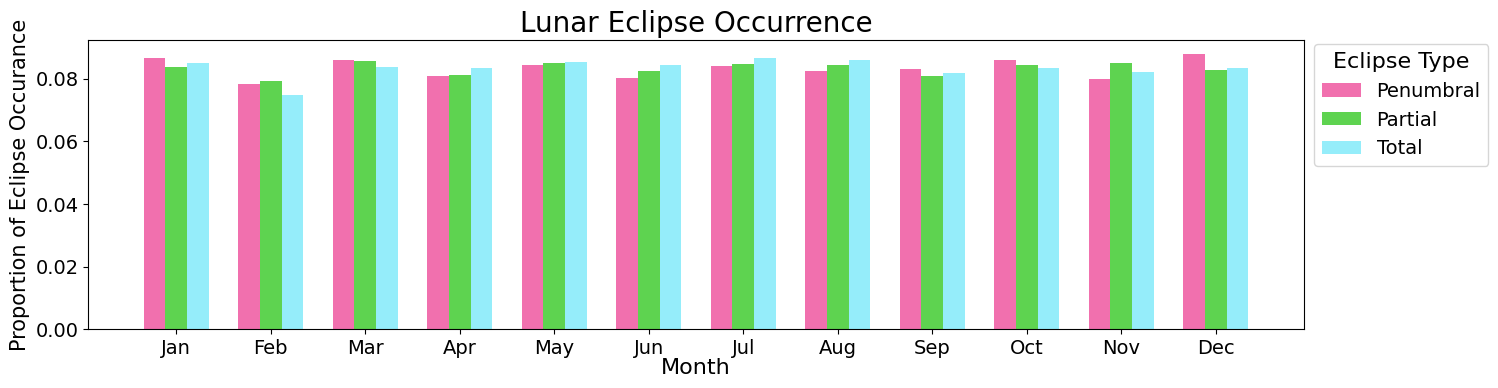

In [12]:
lunar_eclipse_monthly_counts = lunar_df.groupby(['Eclipse.Type', 'Calendar.Month']).size().unstack(fill_value=0)
total_counts = lunar_eclipse_monthly_counts.sum(axis=1)
lunar_eclipse_monthly_counts = lunar_eclipse_monthly_counts.div(total_counts, axis=0)
lunar_eclipse_monthly_counts.columns = month_names

plt.figure(figsize=(15, 4))

bar_width = 0.23
colors = ["#F170AE", "#5ED350", "#95EDFA"]
eclipses = ["N", "P", "T"]
eclipse_names = ["Penumbral", "Partial", "Total"]
for i, eclipse in enumerate(eclipses):
    plt.bar(np.arange(len(lunar_eclipse_monthly_counts.columns)) + i * bar_width, lunar_eclipse_monthly_counts.loc[eclipse],
            width=bar_width, color=colors[i], label=f"{eclipse_names[i]}", align='center')

plt.title("Lunar Eclipse Occurrence", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Proportion of Eclipse Occurance", fontsize=15)
x_values = np.arange(len(lunar_eclipse_monthly_counts.columns)) + (len(eclipses) - 1) * bar_width / 2
plt.xticks(x_values, lunar_eclipse_monthly_counts.columns)
plt.gca().set_xlabel('Month', labelpad=10)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.legend(title="Eclipse Type", loc="upper right", bbox_to_anchor=(1.16, 1.02), fontsize=14, title_fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


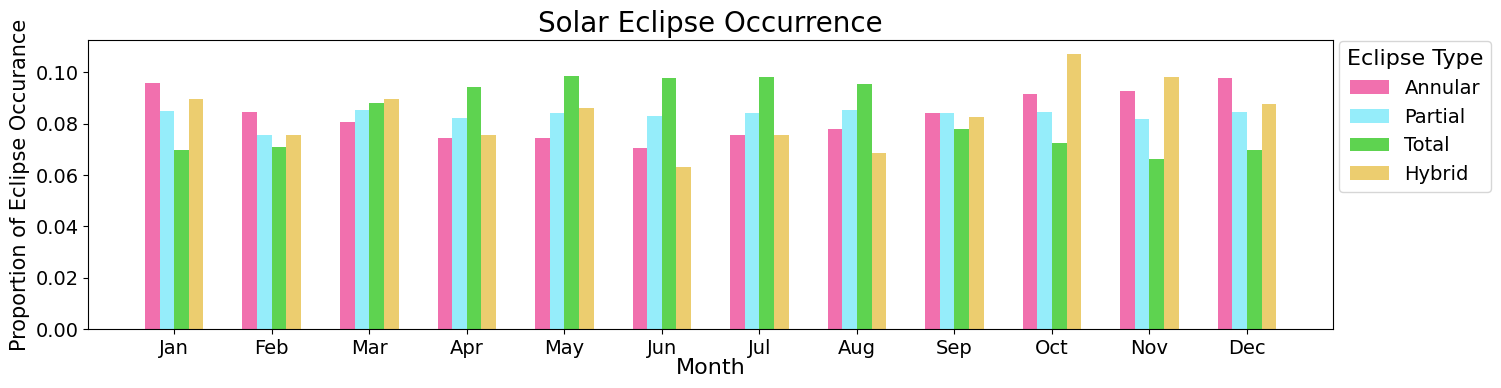

In [25]:
solar_eclipse_monthly_counts = solar_df.groupby(['Eclipse.Type', 'Calendar.Month']).size().unstack(fill_value=0)
total_counts = solar_eclipse_monthly_counts.sum(axis=1)
solar_eclipse_monthly_counts = solar_eclipse_monthly_counts.div(total_counts, axis=0)

solar_eclipse_monthly_counts.columns = month_names
solar_eclipse_monthly_counts

plt.figure(figsize=(15, 4))

bar_width = 0.15
colors = ["#F170AE", "#95EDFA", "#5ED350", "#ECCD6F"]
eclipses = ["A", "P", "T", "H"]
eclipse_names = ["Annular", "Partial", "Total", "Hybrid"]
for i, eclipse in enumerate(eclipses):
    plt.bar(np.arange(len(solar_eclipse_monthly_counts.columns)) + i * bar_width, solar_eclipse_monthly_counts.loc[eclipse],
            width=bar_width, color=colors[i], label=f"{eclipse_names[i]}", align='center')

plt.title("Solar Eclipse Occurrence", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Proportion of Eclipse Occurance", fontsize=15)
x_values = np.arange(len(solar_eclipse_monthly_counts.columns)) + (len(eclipses) - 1) * bar_width / 2
plt.xticks(x_values, solar_eclipse_monthly_counts.columns)
plt.gca().set_xlabel('Month', labelpad=10)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.legend(title="Eclipse Type", loc="upper right", bbox_to_anchor=(1.135, 1.03), fontsize=14, title_fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()